# Classification: Intovert vs Extrovert
We will use various ML algorithm and DL models to classify.

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.losses import BinaryCrossentropy
warnings.filterwarnings("ignore")

2025-06-19 07:22:40.659557: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750317760.999671      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750317761.105489      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# load and view data 
data = pd.read_csv("/kaggle/input/extrovert-vs-introvert-behavior-data/personality_datasert.csv")
df = data.copy()
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# Exporatory Data Analysis

In [3]:
df.shape

(2900, 8)

In [4]:
df.columns.to_list()

['Time_spent_Alone',
 'Stage_fear',
 'Social_event_attendance',
 'Going_outside',
 'Drained_after_socializing',
 'Friends_circle_size',
 'Post_frequency',
 'Personality']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [6]:
df.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [7]:
df.duplicated().sum()

402

In [8]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [9]:
df['Personality'].value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

In [10]:
df.groupby('Personality')[['Time_spent_Alone',
 'Social_event_attendance',
 'Going_outside',
 'Friends_circle_size',
 'Post_frequency']].mean()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Personality,,,,,
Extrovert,2.122869,5.977850,4.596244,9.095744,5.592647
Introvert,7.027444,1.831621,1.310859,3.277465,1.418787


# Visualization

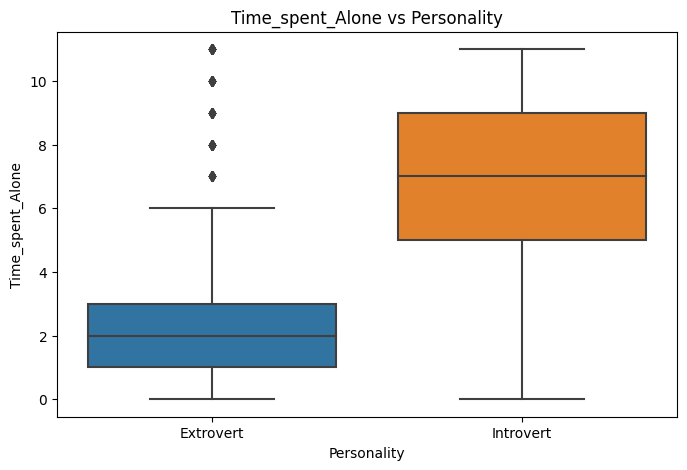

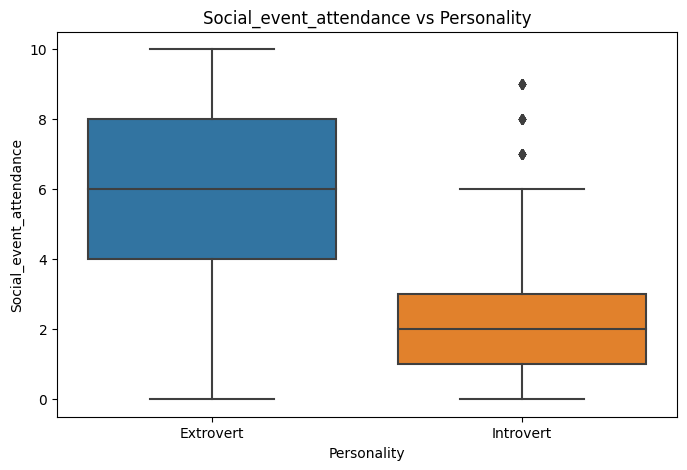

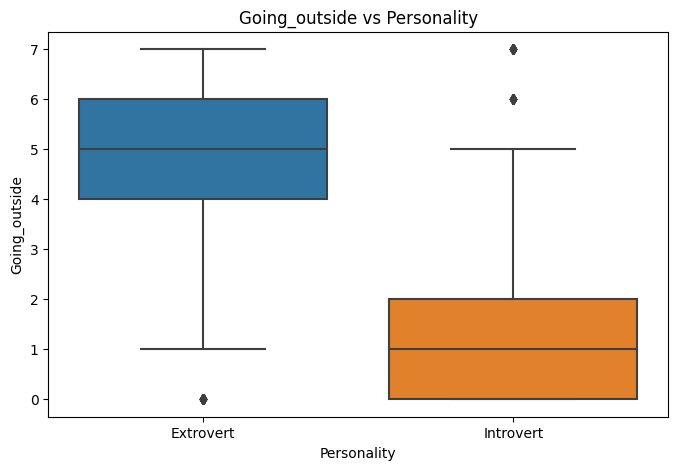

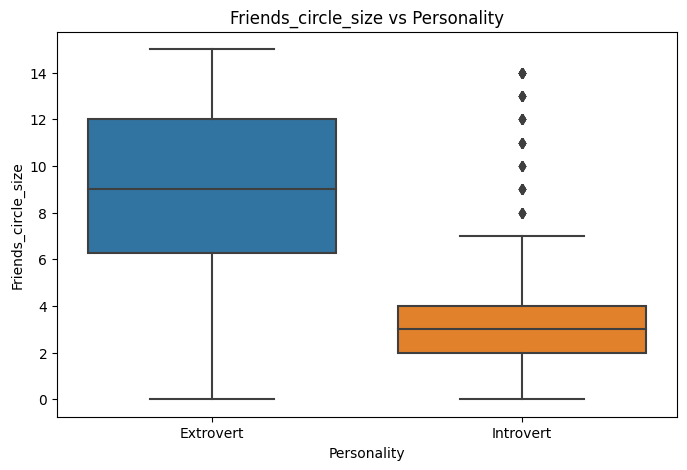

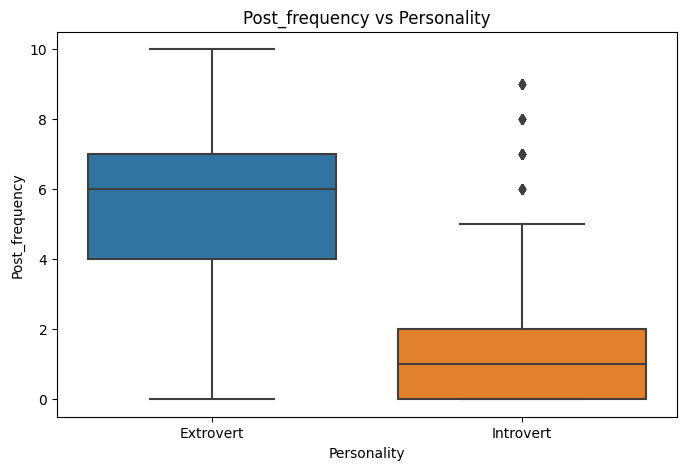

In [11]:
# Analyzing numerical features - boxplot
numerical_features = df.select_dtypes(include=['float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Personality',y=feature, data=df)
    plt.title(f"{feature} vs Personality")
    plt.show()

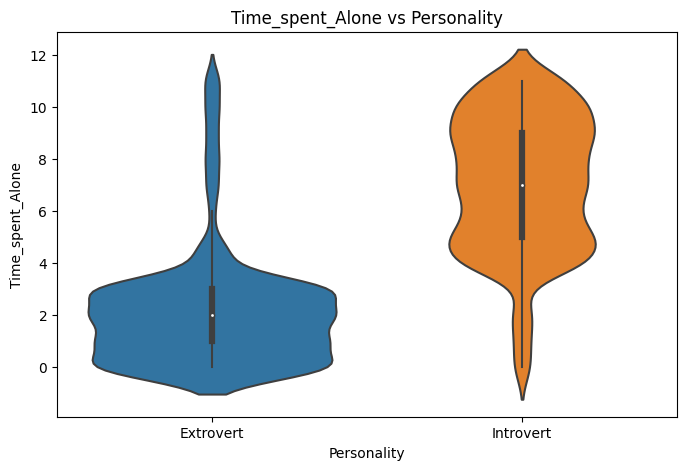

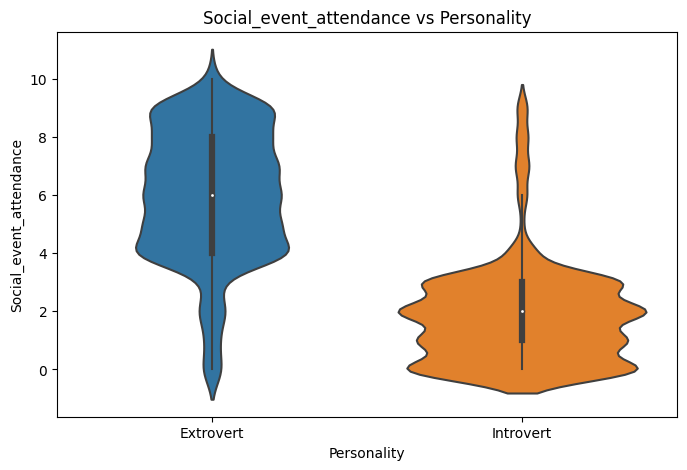

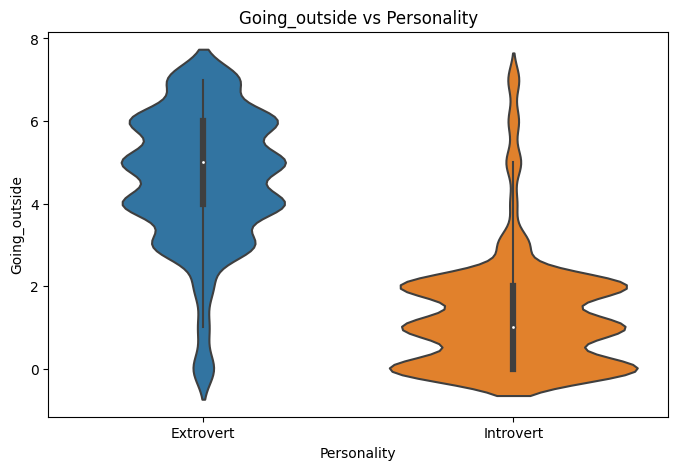

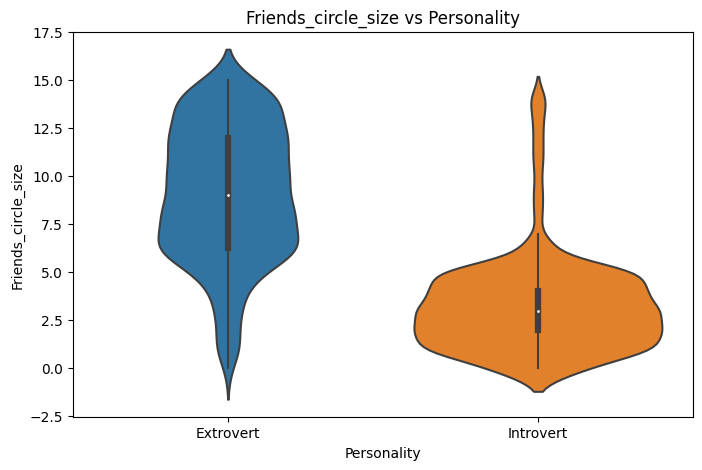

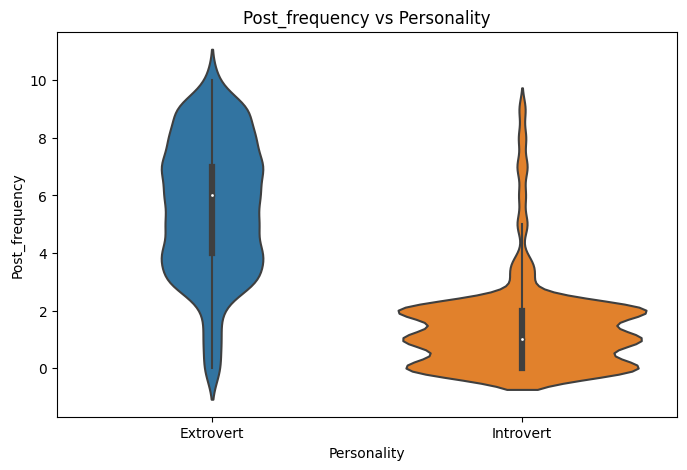

In [12]:
# Analyzing numerical features - violin plots
numerical_features = df.select_dtypes(include=['float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8,5))
    sns.violinplot(x='Personality',y=feature, data=df)
    plt.title(f"{feature} vs Personality")
    plt.show()

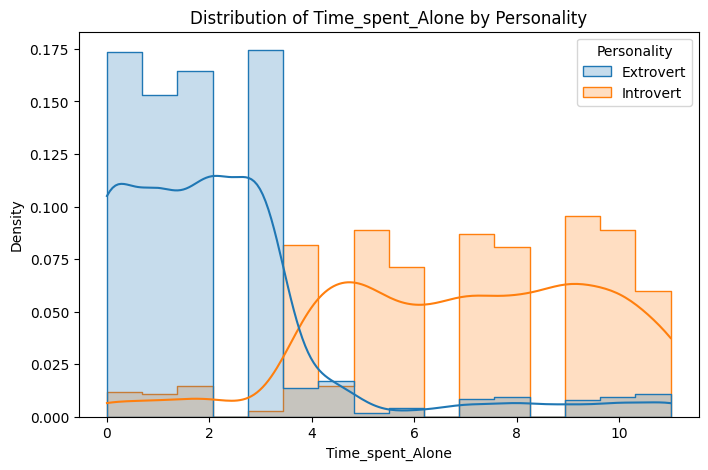

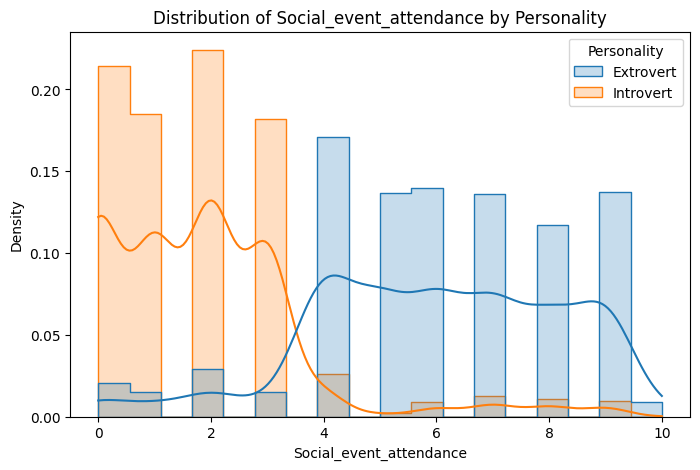

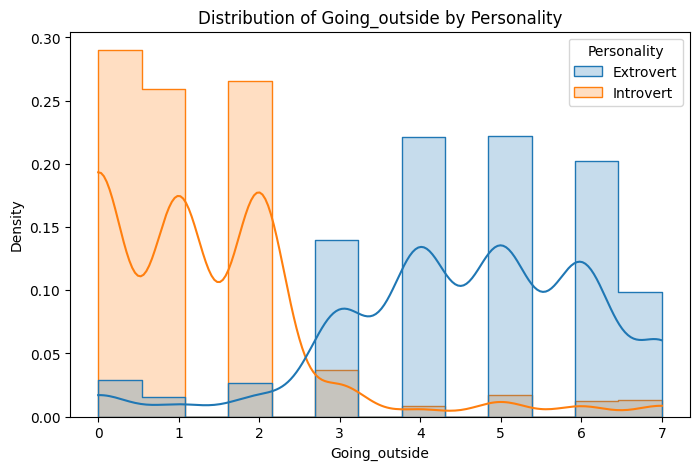

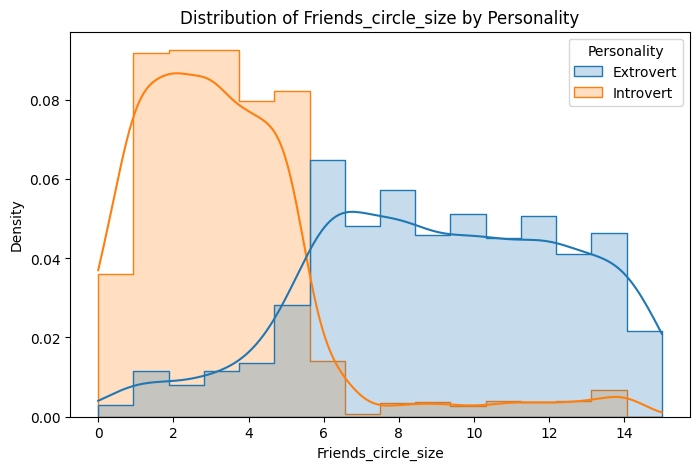

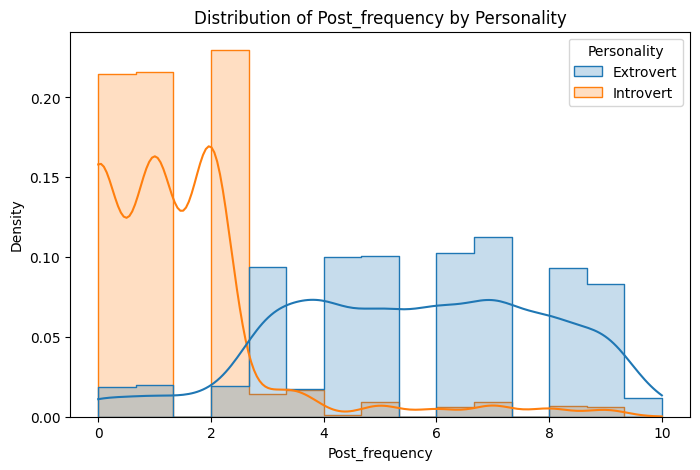

In [13]:
# Analyzing distribution of numerical features - histplot
numerical_features = df.select_dtypes(include=['float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8,5))
    sns.histplot(x=feature,hue='Personality', data=df, kde=True, element='step',stat='density')
    plt.title(f"Distribution of {feature} by Personality")
    plt.show()

In [14]:
# let's analyze categorical columns too
print(df['Stage_fear'].value_counts())
print(df['Drained_after_socializing'].value_counts())

Stage_fear
No     1490
Yes    1410
Name: count, dtype: int64
Drained_after_socializing
No     1493
Yes    1407
Name: count, dtype: int64


In [15]:
# let's do crosstabulation 
pd.crosstab(df['Stage_fear'], df['Personality'], normalize='index') * 100

Personality,Extrovert,Introvert
Stage_fear,,
No,92.61745,7.38255
Yes,7.87234,92.12766


In [16]:
pd.crosstab(df['Drained_after_socializing'], df['Personality'], normalize='index') * 100

Personality,Extrovert,Introvert
Drained_after_socializing,,
No,92.431346,7.568654
Yes,7.889126,92.110874


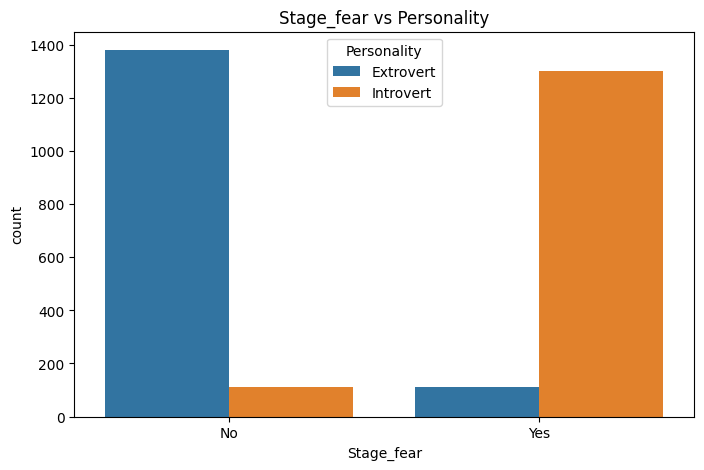

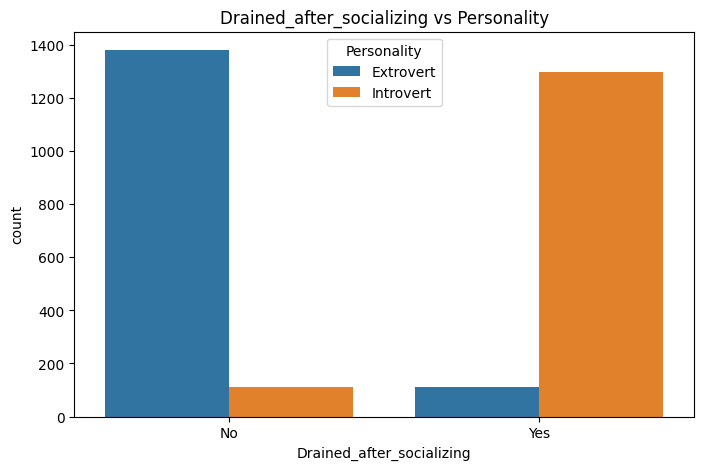

In [17]:
# Countplot with hue
categorical_cols = ['Stage_fear','Drained_after_socializing']
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x = col, hue='Personality')
    plt.title(f"{col} vs Personality")
    plt.show()

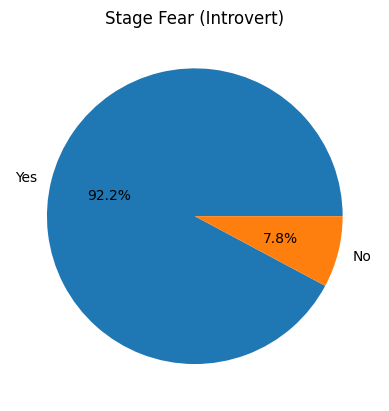

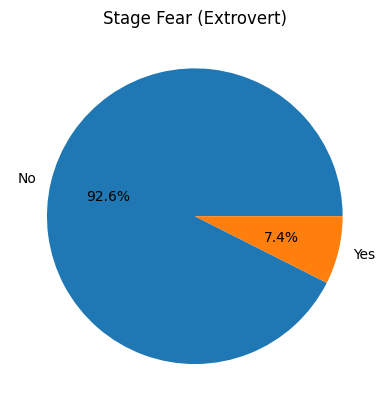

In [18]:
# Distribution of Stage_fear among Introverts
df[df['Personality'] == 'Introvert']['Stage_fear'].value_counts().plot.pie(autopct='%1.1f%%', title='Stage Fear (Introvert)', ylabel='')
plt.show()

# Distribution among Extroverts
df[df['Personality'] == 'Extrovert']['Stage_fear'].value_counts().plot.pie(autopct='%1.1f%%', title='Stage Fear (Extrovert)', ylabel='')
plt.show()


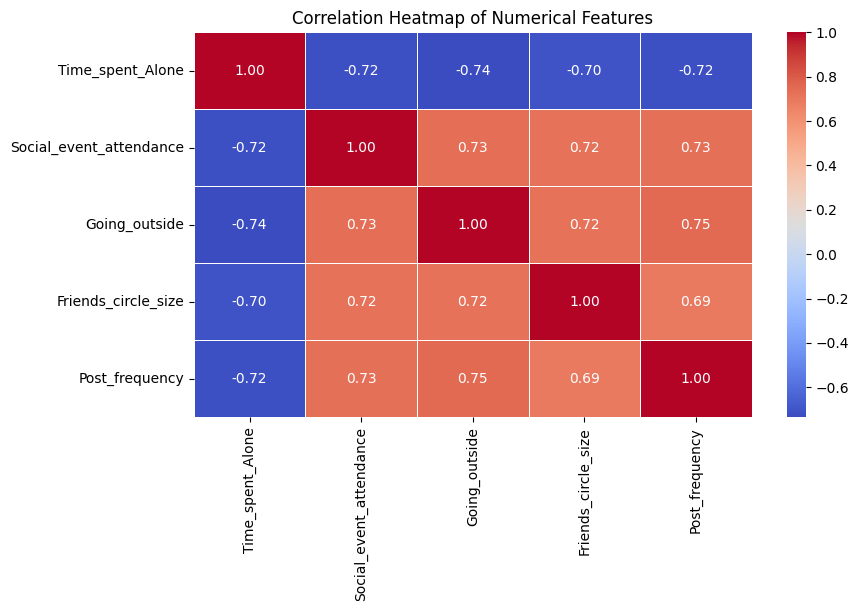

In [19]:
# Now let's get done with visualization : correlation + heatmap
numerical_features = df.select_dtypes(include=['float64']).columns

corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(9,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt = '.2f',linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Modeling